# Input data

In [ ]:
import pandas as pd
import numpy as np

In [2]:
raw_cl = pd.read_csv('crime_landUse_MAN.csv')
raw_cl

,CrimeType,DayofWeek,TimeRange,Time,Day,Lot,LandUseID,LandUse,CrimeTypeID
0,ASSAULT,Sunday,20-21,20,1,33,4,Mixed Residential & Commercial Buildings,3
1,LARCENY,Monday,17-18,17,2,21,2,Multi-Family Walk-Up Buildings,1
2,LARCENY,Friday,23-24,23,6,29,8,Public Facilities & Institutions,1
3,LARCENY,Tuesday,18-19,18,3,36,5,Commercial & Office Buildings,1
4,HARASSMENT,Thursday,19-20,19,5,29,8,Public Facilities & Institutions,2
...,...,...,...,...,...,...,...,...,...
201570,LARCENY,Friday,17-18,17,6,62,4,Mixed Residential & Commercial Buildings,1
201571,LARCENY,Sunday,10-11,10,1,7,4,Mixed Residential & Commercial Buildings,1
201572,LARCENY,Friday,20-21,20,6,52,2,Multi-Family Walk-Up Buildings,1
201573,LARCENY,Sunday,20-21,20,1,1,9,Open Space and Outdoor Recreation,1


# Have a look at the data

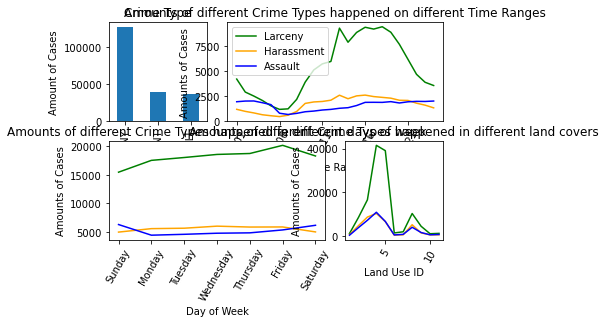

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)

#Amounts of cases of different Crime Types
plt.subplot2grid((2,3),(0,0))
raw_cl.CrimeType.value_counts().plot(kind='bar')
plt.title("Crime Type")
plt.ylabel(u"Amount of Cases")  

#Time
plt.subplot2grid((2,3),(0,1), colspan=2)
rowsTitles=['00-01','01-02','02-03','03-04','04-05','05-06','06-07','07-08',
            '08-09','09-10','10-11','11-12','12-13','13-14','14-15','15-16',
            '16-17','17-18','18-19','19-20','20-21','21-22','22-23','23-24']
((raw_cl.TimeRange[raw_cl.CrimeTypeID == 1].value_counts()).reindex(rowsTitles)).plot(kind='line',color="green")
((raw_cl.TimeRange[raw_cl.CrimeTypeID == 2].value_counts()).reindex(rowsTitles)).plot(kind='line',color="orange")
((raw_cl.TimeRange[raw_cl.CrimeTypeID == 3].value_counts()).reindex(rowsTitles)).plot(kind='line',color="blue")
plt.xlabel("Time Range")# plots an axis lable
plt.ylabel("Amounts of Cases") 
plt.xticks(rotation=60)
plt.title("Amounts of different Crime Types happened on different Time Ranges")
plt.legend(('Larceny', 'Harassment','Assault'),loc='best') # sets our legend for our graph.

#Day of Week
plt.subplot2grid((2,3),(1,0), colspan=2)
rowsTitles2=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
((raw_cl.DayofWeek[raw_cl.CrimeTypeID == 1].value_counts()).reindex(rowsTitles2)).plot(kind='line',color="green")
((raw_cl.DayofWeek[raw_cl.CrimeTypeID == 2].value_counts()).reindex(rowsTitles2)).plot(kind='line',color="orange")
((raw_cl.DayofWeek[raw_cl.CrimeTypeID == 3].value_counts()).reindex(rowsTitles2)).plot(kind='line',color="blue")
plt.xlabel("Day of Week")# plots an axis lable
plt.ylabel("Amounts of Cases") 
plt.xticks(rotation=60)
plt.title("Amounts of different Crime Types happened in different days of week")

#Land use
plt.subplot2grid((2,3),(1,2), colspan=2)
rowsTitles3=[1,2,3,4,5,6,7,8,9,10,11]
((raw_cl.LandUseID[raw_cl.CrimeTypeID == 1].value_counts()).reindex(rowsTitles3)).plot(kind='line',color="green")
((raw_cl.LandUseID[raw_cl.CrimeTypeID == 2].value_counts()).reindex(rowsTitles3)).plot(kind='line',color="orange")
((raw_cl.LandUseID[raw_cl.CrimeTypeID == 3].value_counts()).reindex(rowsTitles3)).plot(kind='line',color="blue")
plt.xlabel("Land Use ID")# plots an axis lable
plt.ylabel("Amounts of Cases") 
plt.xticks(rotation=60)
plt.title("Amounts of different Crime Types happened in different land covers")

plt.show()

# Feature Engineering

In [4]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
crime = label.fit_transform(raw_cl.CrimeType)
days = pd.get_dummies(raw_cl.DayofWeek)
landuses = pd.get_dummies(raw_cl.LandUseID)
times = pd.get_dummies(raw_cl.Time)
cl=pd.concat([landuses,times],axis=1)
cl['crime']=crime

In [5]:
from sklearn.model_selection import train_test_split
training,test=train_test_split(cl,train_size=0.85,random_state=42)

In [6]:
larceny = training['crime'] == 2
la = training[larceny]
la

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,crime
100195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
197841,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,2
198531,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
99673,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
180806,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
103694,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
131932,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
146867,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2


In [7]:
#the number of crime records about larceny is too large which might cause imbalanced problem
remove = training[training.crime == 2].sample(72000,random_state=42)
new_training = training[~training.index.isin(remove.index)]

In [8]:
larceny = new_training['crime'] == 2
la = new_training[larceny]
la

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,crime
198531,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
113157,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
47394,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
19384,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
175073,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64925,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
41090,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
54886,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
103694,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [9]:
harassment = training['crime'] == 1
ha = training[harassment]
ha

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,crime
176391,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
91760,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
126222,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
18158,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
188141,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59735,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
175203,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
126324,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
112727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
assault = training['crime'] == 0
aa = training[assault]
aa

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,crime
186366,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97966,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
182483,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
188714,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
159536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84654,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
130523,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84478,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5311,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train,validation=train_test_split(new_training,train_size=0.7)

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
feature_list = train.columns.tolist()
feature_list = feature_list[:len(feature_list) - 1] 

# naive bayes

In [13]:
from sklearn.naive_bayes import BernoulliNB
model_NB = BernoulliNB()
model_NB.fit(train[feature_list], train['crime'])
pred_NB_value = np.array(model_NB.predict(test[feature_list]))
predicted_NB = np.array(model_NB.predict_proba(test[feature_list]))
print ("Log loss of Naive Bayes Model is %f" % (log_loss(test['crime'],predicted_NB))),confusion_matrix(test['crime'],pred_NB_value),accuracy_score(test['crime'],pred_NB_value)

Log loss of Naive Bayes Model is 1.077632


(None, array([[ 1830,  1877,  1890],
        [  874,  2642,  2249],
        [ 2689,  5215, 10971]], dtype=int64), 0.5107318847769289)

# logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()
model_LR.fit(train[feature_list], train['crime'])
pred_LR_value = np.array(model_LR.predict(test[feature_list]))
predicted_LR = np.array(model_LR.predict_proba(test[feature_list]))
print ("Log loss of Logistic Regression is %f" %(log_loss(test['crime'], predicted_LR))),confusion_matrix(test['crime'],pred_LR_value),accuracy_score(test['crime'],pred_LR_value)

C:\Users\volca\.conda\envs\GEO503\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\volca\.conda\envs\GEO503\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Log loss of Logistic Regression is 1.020082


(None, array([[ 2176,  1682,  1739],
        [ 1153,  2449,  2163],
        [ 3379,  4822, 10674]], dtype=int64), 0.5059695075569667)

# random forest

In [26]:
from sklearn.ensemble import RandomForestClassifier  
model_RF = RandomForestClassifier()  
model_RF.fit(train[feature_list], train['crime'])
pred_RF_value = np.array(model_RF.predict(test[feature_list]))
predicted_RF = np.array(model_RF.predict_proba(test[feature_list]))
print ("Log loss of Random Forest Model is %f" %(log_loss(test['crime'], predicted_RF))),confusion_matrix(test['crime'],pred_RF_value),precision_score(test['crime'],pred_RF_value,average="weighted"),f1_score(test['crime'],pred_RF_value,average="weighted")

C:\Users\volca\.conda\envs\GEO503\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Log loss of Random Forest Model is 1.021651


(None, array([[ 2282,  1686,  1629],
        [ 1299,  2412,  2054],
        [ 3713,  4866, 10296]], dtype=int64), 0.5689839951656822, 0.5192336889220297)

# knn 

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(train[feature_list], train['crime'])
pred_KNN_value = np.array(model_knn.predict(test[feature_list]))
predicted_KNN = np.array(model_knn.predict_proba(test[feature_list]))
print ("Log loss of Random Forest Model is %f" %(log_loss(test['crime'], predicted_KNN))),confusion_matrix(test['crime'],pred_KNN_value),precision_score(test['crime'],pred_KNN_value,average="weighted"),f1_score(test['crime'],pred_KNN_value,average="weighted")

Log loss of Random Forest Model is 5.398110


(None, array([[2786, 1522, 1289],
        [2454, 1783, 1528],
        [6786, 5230, 6859]], dtype=int64), 0.5252119018563318, 0.40599948509125816)

# Parameter Tuning for random forest

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_test1 = {'n_estimators':range(10,501,1)}#450;200
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(random_state=42),
                        param_grid = param_test1,
                        scoring='neg_log_loss')
gsearch1.fit(validation[feature_list], validation['crime'])

C:\Users\volca\.conda\envs\GEO503\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_gr

In [18]:
gsearch1.best_params_

{'n_estimators': 473}

In [28]:
model_RF1 = RandomForestClassifier(n_estimators=473,
                                   random_state=42)  
model_RF1.fit(new_training[feature_list], new_training['crime'])
pred_RF1_value = np.array(model_RF1.predict(test[feature_list]))
predicted_RF1 = np.array(model_RF1.predict_proba(test[feature_list]))
print ("Log loss of Random Forest Model is %f" %(log_loss(test['crime'], predicted_RF1))),confusion_matrix(test['crime'],pred_RF1_value),precision_score(test['crime'],pred_RF_value,average="weighted"),f1_score(test['crime'],pred_RF_value,average="weighted")

Log loss of Random Forest Model is 1.018632


(None, array([[ 2293,  1601,  1703],
        [ 1262,  2366,  2137],
        [ 3614,  4768, 10493]], dtype=int64), 0.5689839951656822, 0.5192336889220297)

In [20]:
param_test2 = {'max_depth':range(10,101,10), 'min_samples_split':range(50,1001,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 473,
                                                           random_state=42),
                        param_grid = param_test2,
                        scoring='neg_log_loss',
                        iid=False)
gsearch2.fit(new_training[feature_list], new_training['crime'])

C:\Users\volca\.conda\envs\GEO503\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=473, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={

In [21]:
gsearch2.best_params_

{'max_depth': 30, 'min_samples_split': 810}

In [30]:
model_RF2 = RandomForestClassifier(n_estimators=473, 
                                   max_depth=30,
                                   min_samples_split=810,
                                   random_state=42)  
model_RF2.fit(new_training[feature_list], new_training['crime'])
pred_RF2_value = np.array(model_RF2.predict(test[feature_list]))
predicted_RF2 = np.array(model_RF2.predict_proba(test[feature_list]))
print ("Log loss of Random Forest Model is %f" %(log_loss(test['crime'], predicted_RF2))),
confusion_matrix(test['crime'],pred_RF2_value),
precision_score(test['crime'],pred_RF_value,average="weighted"),
f1_score(test['crime'],pred_RF_value,average="weighted")

Log loss of Random Forest Model is 1.016838


(None, array([[ 2283,  1619,  1695],
        [ 1244,  2386,  2135],
        [ 3605,  4767, 10503]], dtype=int64), 0.5689839951656822, 0.5192336889220297)

In [31]:
param_test3 = {'min_samples_leaf':range(10,101,10)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 473, 
                                                           max_depth=30,
                                                           min_samples_split=810,                                                           
                                                           random_state=42,),
                        param_grid = param_test3,
                        scoring='neg_log_loss',
                        iid=False)
gsearch3.fit(new_training[feature_list], new_training['crime'])

C:\Users\volca\.conda\envs\GEO503\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=30,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=810,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=473, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid={

In [32]:
gsearch3.best_params_

{'min_samples_leaf': 10}

In [39]:
model_RF3 = RandomForestClassifier(n_estimators=473, 
                                   max_depth=30,
                                   min_samples_split=810,
                                   min_samples_leaf=10)  
model_RF3.fit(new_training[feature_list], new_training['crime'])
pred_RF3_value = np.array(model_RF3.predict(test[feature_list]))
predicted_RF3 = np.array(model_RF3.predict_proba(test[feature_list]))
print ("Log loss of Random Forest Model is %f" %(log_loss(test['crime'], predicted_RF3))),confusion_matrix(test['crime'],pred_RF3_value),precision_score(test['crime'],pred_RF_value,average="weighted"),f1_score(test['crime'],pred_RF_value,average="weighted")

Log loss of Random Forest Model is 1.016824


(None, array([[ 2281,  1615,  1701],
        [ 1241,  2383,  2141],
        [ 3589,  4761, 10525]], dtype=int64), 0.5689839951656822, 0.5192336889220297)

In [36]:
param_test4 = {'max_features':range(3,50,2)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 473, 
                                                           max_depth=30, 
                                                           min_samples_split=810,
                                                           min_samples_leaf=10 , 
                                                           random_state=42),
                        param_grid = param_test4,
                        scoring='neg_log_loss',
                        iid=False)
gsearch4.fit(new_training[feature_list], new_training['crime'])

C:\Users\volca\.conda\envs\GEO503\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=30,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=10,
                                              min_samples_split=810,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=473, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid=False, n_jobs=None,
             param_grid=

In [37]:
gsearch4.best_params_

{'max_features': 15}

In [38]:
model_RF1 = RandomForestClassifier(n_estimators= 473, 
                                   max_depth=30, 
                                   min_samples_split=810,
                                   min_samples_leaf=10 ,
                                   max_features=15,
                                   random_state=42)  
model_RF1.fit(new_training[feature_list], new_training['crime'])
pred_RF1_value = np.array(model_RF1.predict(test[feature_list]))
predicted_RF1 = np.array(model_RF1.predict_proba(test[feature_list]))
print ("Log loss of Random Forest Model is %f" %(log_loss(test['crime'], predicted_RF1))),confusion_matrix(test['crime'],pred_RF1_value),precision_score(test['crime'],pred_RF1_value,average="weighted"),f1_score(test['crime'],pred_RF1_value,average="weighted")

Log loss of Random Forest Model is 1.016902


(None, array([[ 2253,  1621,  1723],
        [ 1212,  2390,  2163],
        [ 3531,  4758, 10586]], dtype=int64), 0.5681924156144443, 0.5252655465822164)